In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('laptop-price.csv',index_col=0)

In [3]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
index,,,,,,,,,,,,,,,
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [4]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'ppi', 'Cpu brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'Gpu brand', 'os'],
      dtype='object')

In [5]:
col_to_add=['Company', 'TypeName', 'Ram', 'Weight', 'Price',
       'ppi', 'Cpu brand', 'SSD',
       'Gpu brand', 'os']

df_new=df[col_to_add]

In [6]:
df_new.head()

,Company,TypeName,Ram,Weight,Price,ppi,Cpu brand,SSD,Gpu brand,os
index,,,,,,,,,,
0,Apple,Ultrabook,8,1.37,71378.6832,226.983005,Intel Core i5,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,127.677940,Intel Core i5,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,141.211998,Intel Core i5,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,220.534624,Intel Core i7,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,226.983005,Intel Core i5,256,Intel,Mac


In [7]:
df_new.isna().sum()

Company      0
TypeName     0
Ram          0
Weight       0
Price        0
ppi          0
Cpu brand    0
SSD          0
Gpu brand    0
os           0
dtype: int64

In [8]:
df_new.describe()

,Ram,Weight,Price,ppi,SSD
count,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000
mean,8.461356,2.080047,59924.981175,145.935819,183.634069
std,5.569898,0.806482,37340.350650,43.445969,186.641125
min,1.000000,0.690000,9270.720000,44.019462,0.000000
25%,4.000000,1.500000,31914.720000,127.335675,0.000000
50%,8.000000,2.040000,52107.840000,141.211998,256.000000
75%,8.000000,2.320000,79346.840400,157.350512,256.000000
max,64.000000,11.100000,324954.720000,352.465147,1024.000000


In [9]:
df_new['SSD'].unique()

array([ 128,    0,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,
        240,    8])

In [10]:
df_new.drop(df_new[df_new['SSD'] == 0].index,inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_2148\3181442074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(df_new[df_new['SSD'] == 0].index,inplace=True)


In [11]:
df_new['SSD'].unique()

array([ 128,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,  240,
          8])

In [12]:
df_new.shape

(820, 10)

In [13]:
print(df_new.head())

      Company   TypeName  Ram  Weight        Price         ppi      Cpu brand  \
index                                                                           
0       Apple  Ultrabook    8    1.37   71378.6832  226.983005  Intel Core i5   
2          HP   Notebook    8    1.86   30636.0000  141.211998  Intel Core i5   
3       Apple  Ultrabook   16    1.83  135195.3360  220.534624  Intel Core i7   
4       Apple  Ultrabook    8    1.37   96095.8080  226.983005  Intel Core i5   
8        Asus  Ultrabook   16    1.30   79653.6000  157.350512  Intel Core i7   

       SSD Gpu brand                  os  
index                                     
0      128     Intel                 Mac  
2      256     Intel  Others/No OS/Linux  
3      512       AMD                 Mac  
4      256     Intel                 Mac  
8      512    Nvidia             Windows  


In [14]:
df_new['Cpu brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'Intel Core i3',
       'Other Intel Processor', 'AMD Processor'], dtype=object)

In [15]:
df_new['Cpu brand']=df_new['Cpu brand'].replace('Intel Core i5','i5')
df_new['Cpu brand']=df_new['Cpu brand'].replace('Intel Core i7','i7')
df_new['Cpu brand']=df_new['Cpu brand'].replace('Intel Core i3','i3')
df_new['Cpu brand']=df_new['Cpu brand'].replace('Other Intel Processor','unknown')

C:\Users\pc\AppData\Local\Temp\ipykernel_2148\305184963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cpu brand']=df_new['Cpu brand'].replace('Intel Core i5','i5')
C:\Users\pc\AppData\Local\Temp\ipykernel_2148\305184963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cpu brand']=df_new['Cpu brand'].replace('Intel Core i7','i7')
C:\Users\pc\AppData\Local\Temp\ipykernel_2148\305184963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [16]:
df_new['Company'].value_counts()

Company
Lenovo       195
Dell         185
HP           159
Asus          99
MSI           52
Acer          43
Toshiba       38
Apple         11
Razer          7
Samsung        7
Microsoft      6
Mediacom       4
Xiaomi         4
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

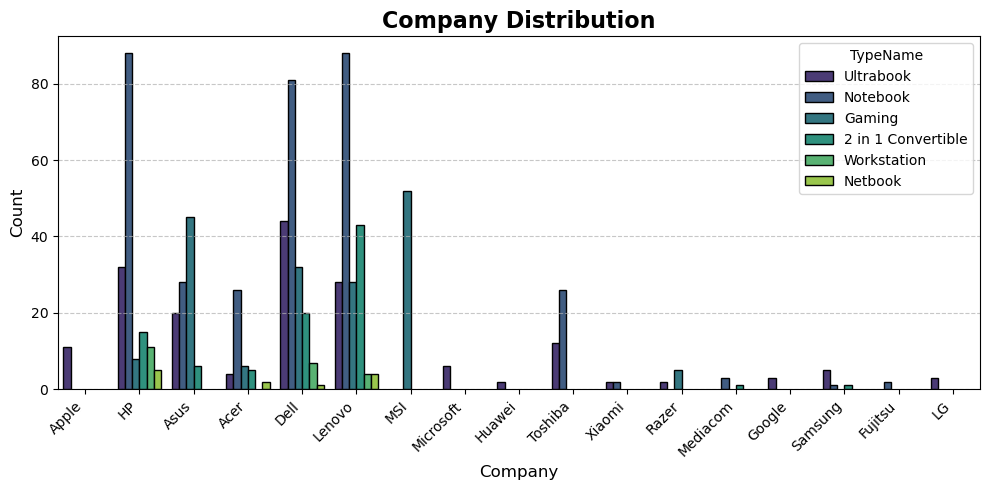

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_new,x=df_new['Company'] ,palette='viridis' ,edgecolor='black' ,hue=df_new['TypeName'])
plt.title('Company Distribution', fontsize=16,fontweight='bold')
plt.xlabel('Company',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.xticks(rotation=45,ha='right',fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_2148\3623862417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new ,x=df['Company'],palette='bright',edgecolor='black')


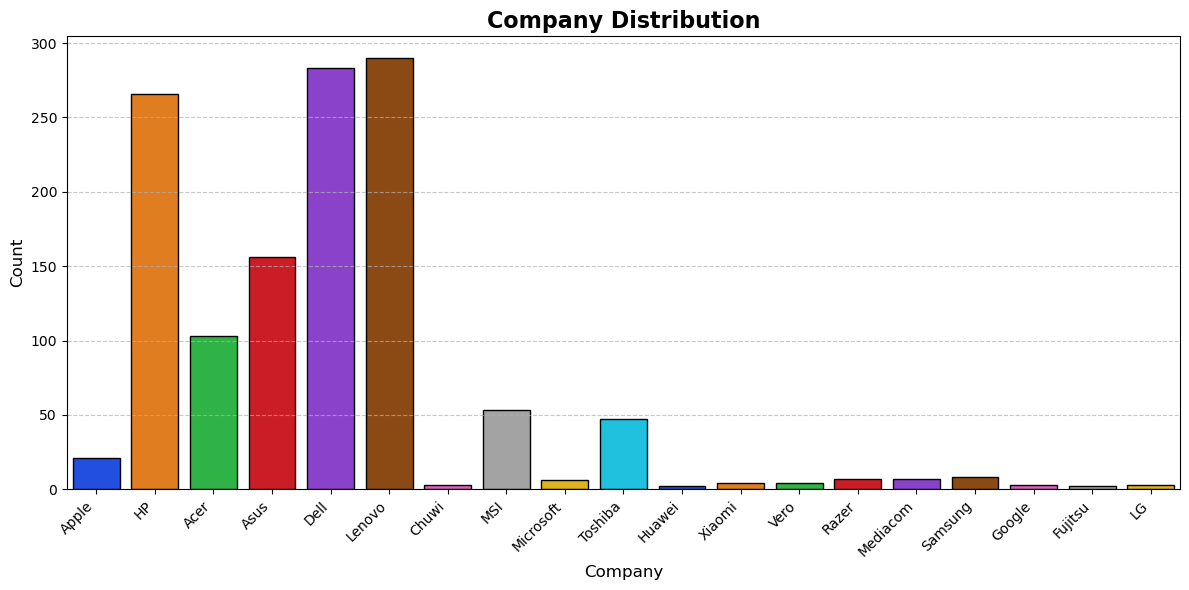

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_new ,x=df['Company'],palette='bright',edgecolor='black')
plt.title("Company Distribution",fontsize=16,fontweight='bold')
plt.xlabel('Company',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
print(df_new['Price'].max())
print(df_new['Price'].min())
print(df_new['Price'].mean())


324954.72
9270.72
74060.67689560975


In [20]:
df_new.columns


Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'ppi', 'Cpu brand',
       'SSD', 'Gpu brand', 'os'],
      dtype='object')

<Axes: >

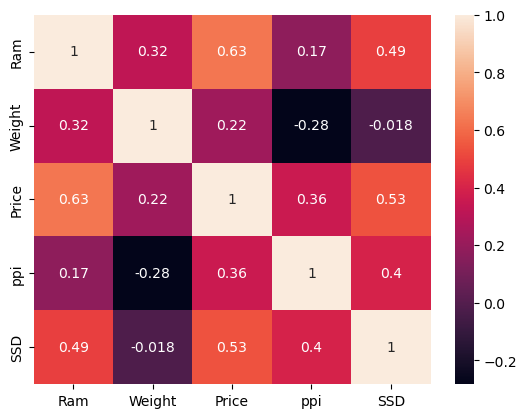

In [21]:
col=[ 'Ram', 'Weight', 'Price', 'ppi', 
       'SSD']
sns.heatmap(df_new[col].corr(),
            annot=True
           
           )

In [22]:
df_new.head()

,Company,TypeName,Ram,Weight,Price,ppi,Cpu brand,SSD,Gpu brand,os
index,,,,,,,,,,
0,Apple,Ultrabook,8,1.37,71378.6832,226.983005,i5,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,141.211998,i5,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,220.534624,i7,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,226.983005,i5,256,Intel,Mac
8,Asus,Ultrabook,16,1.30,79653.6000,157.350512,i7,512,Nvidia,Windows


<Axes: ylabel='Price'>

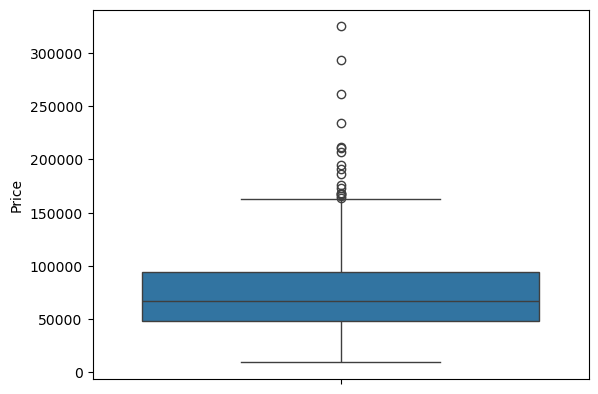

In [23]:
sns.boxplot(data=df_new['Price'])

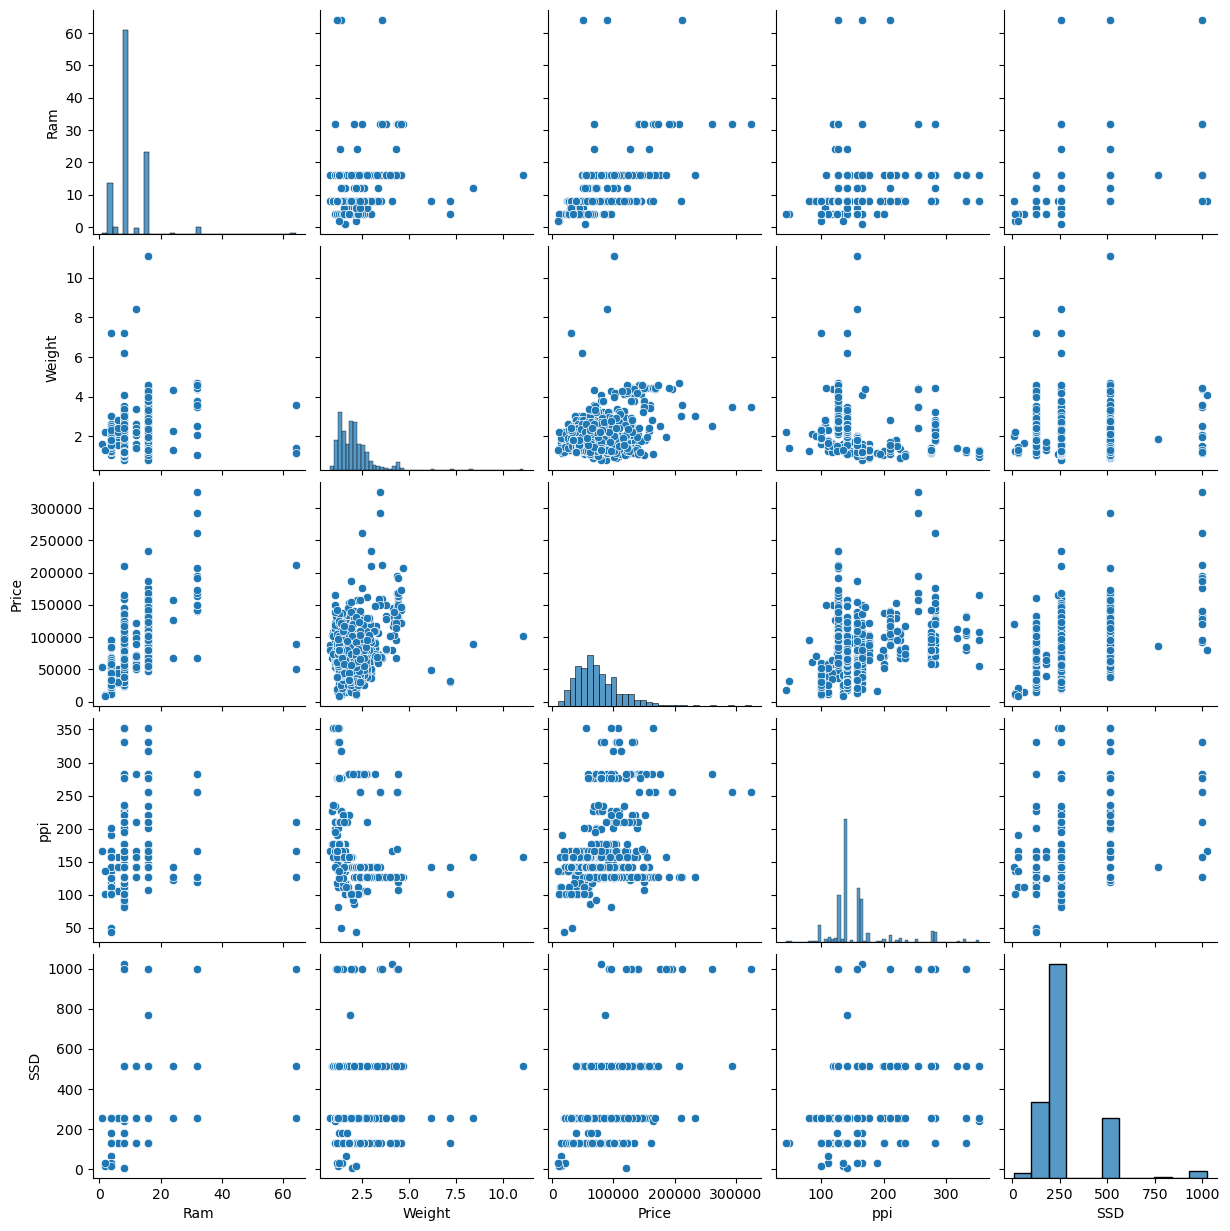

In [24]:
sns.pairplot(data=df_new)

In [25]:
import inspect
print(inspect.signature(sns.barplot))

(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)


In [26]:
print(inspect.getsource(sns.countplot))

def countplot(
    data=None, *, x=None, y=None, hue=None, order=None, hue_order=None,
    orient=None, color=None, palette=None, saturation=.75, fill=True, hue_norm=None,
    stat="count", width=.8, dodge="auto", gap=0, log_scale=None, native_scale=False,
    formatter=None, legend="auto", ax=None, **kwargs
):

    if x is None and y is not None:
        orient = "y"
        x = 1 if list(y) else None
    elif x is not None and y is None:
        orient = "x"
        y = 1 if list(x) else None
    elif x is not None and y is not None:
        raise TypeError("Cannot pass values for both `x` and `y`.")

    p = _CategoricalAggPlotter(
        data=data,
        variables=dict(x=x, y=y, hue=hue),
        order=order,
        orient=orient,
        color=color,
        legend=legend,
    )

    if ax is None:
        ax = plt.gca()

    if p.plot_data.empty:
        return ax

    if dodge == "auto":
        # Needs to be before scale_categorical changes the coordinate series dtype
     

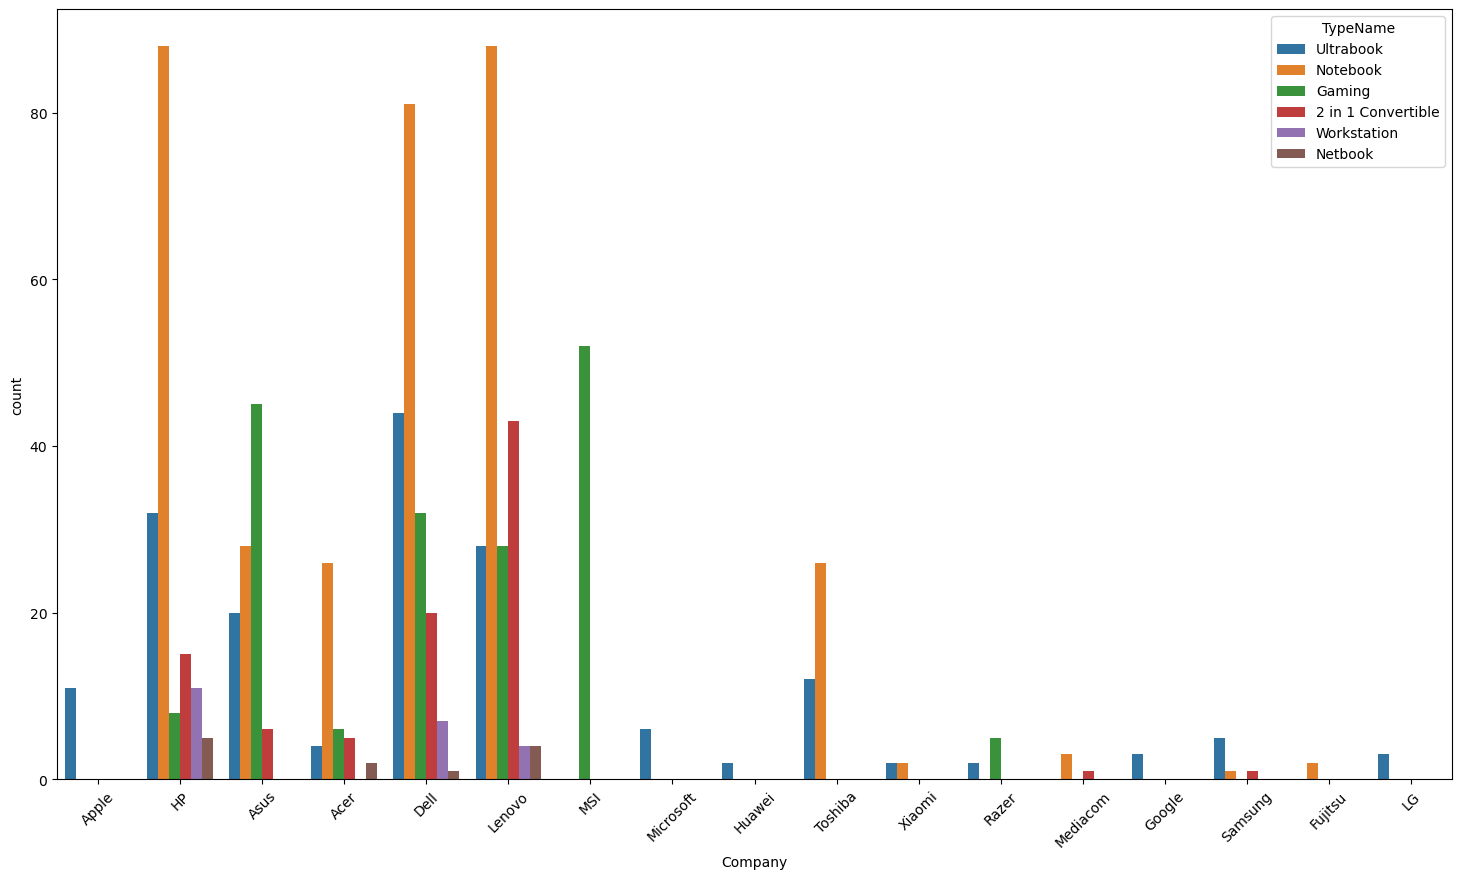

In [27]:
plt.figure(figsize=(18,10))
sns.countplot(
    data=df_new,  x=df_new['Company'],  hue=df_new['TypeName'], order=None, hue_order=None,
    orient=None, color=None, palette=None, saturation=.75, fill=True, hue_norm=None,
    stat="count", width=.8, dodge="auto", gap=0, log_scale=None, native_scale=False,
    formatter=None, legend="auto", ax=None
)
plt.xticks(rotation=45)
plt.show()

In [28]:
df_price=df_new[(df_new['Price'] <= 100000) & (df_new['Company'] == 'Lenovo')  & (df_new['Cpu brand'] == 'i7')]

In [29]:
df_price.head()

,Company,TypeName,Ram,Weight,Price,ppi,Cpu brand,SSD,Gpu brand,os
index,,,,,,,,,,
109,Lenovo,Notebook,8,1.58,78854.40,157.350512,i7,256,Intel,Windows
142,Lenovo,Gaming,8,2.40,46300.32,141.211998,i7,256,Nvidia,Others/No OS/Linux
163,Lenovo,Gaming,16,2.50,57489.12,141.211998,i7,256,Nvidia,Windows
182,Lenovo,2 in 1 Convertible,16,1.40,98514.72,316.965060,i7,512,Intel,Windows
203,Lenovo,Gaming,16,3.20,93186.72,141.211998,i7,512,Nvidia,Windows


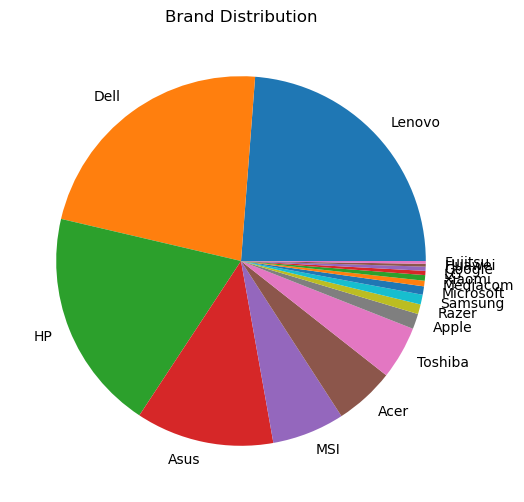

In [30]:
plt.figure(figsize=(6,6))
plt.pie(
    x=df_new['Company'].value_counts(),
    labels=df_new['Company'].value_counts().index
)
plt.title('Brand Distribution')
plt.show()

<Axes: ylabel='Price'>

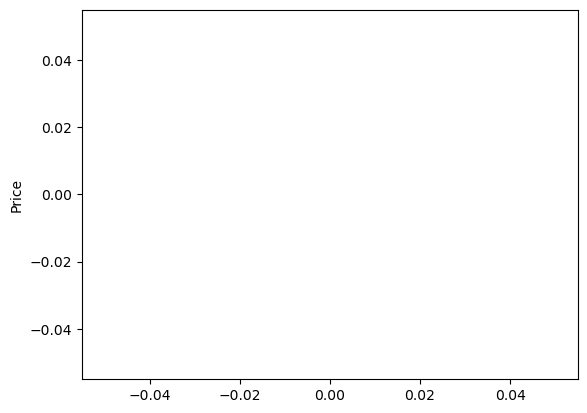

In [31]:
sns.scatterplot(data=df_new ,y=df_new.Price)

In [32]:
inspect.signature(sns.scatterplot)

<Signature (data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)>

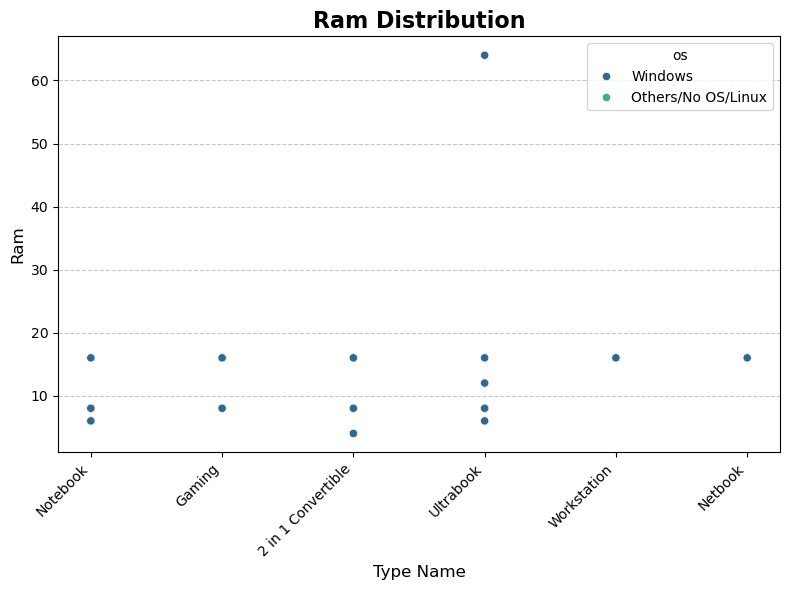

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_price ,x=df_price.TypeName,y=df_price.Ram ,palette='viridis',hue=df_price.os)
plt.title('Ram Distribution' ,fontsize=16,fontweight='bold')
plt.xlabel('Type Name',fontsize=12)
plt.ylabel('Ram',fontsize=12)
plt.xticks(rotation=45 ,ha='right')
plt.grid(axis='y' ,linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [140]:
x=df_new.groupby('Company')[['Price']].mean()
x

,Price
Company,
Acer,44808.492391
Apple,100203.017891
Asus,76214.655855
Dell,76455.512640
Fujitsu,38574.720000
Google,89386.080000
HP,69356.908257
Huawei,75870.720000
LG,111834.720000


C:\Users\pc\AppData\Local\Temp\ipykernel_7296\2017541131.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x,x=x.index,y=x.Price ,palette='muted')


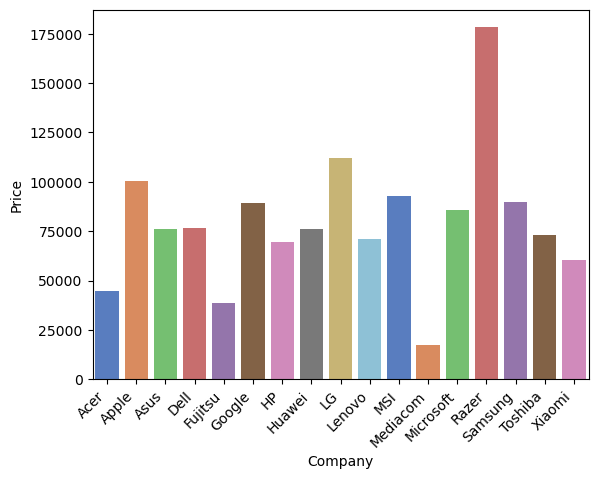

In [144]:
sns.barplot(data=x,x=x.index,y=x.Price ,palette='muted')
plt.xticks(rotation=45,ha='right')
plt.show()

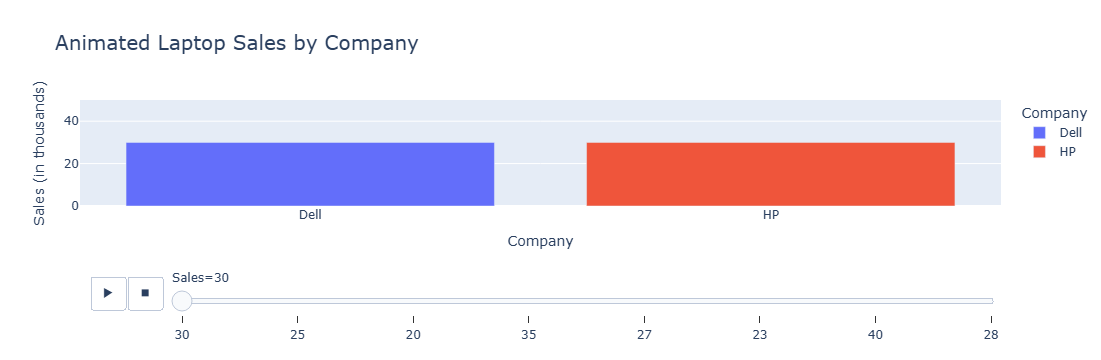

In [150]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'Year': [2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022],
    'Company': ['Dell', 'HP', 'Lenovo', 'Dell', 'HP', 'Lenovo', 'Dell', 'HP', 'Lenovo'],
    'Sales': [30, 25, 20, 35, 27, 23, 40, 30, 28]
}
df = pd.DataFrame(data)

fig = px.bar(
    df,
    x='Company',
    y='Sales',
    color='Company',
    animation_frame='Sales',
    range_y=[0, 50],
    title='Animated Laptop Sales by Company'
)

fig.update_layout(
    xaxis_title='Company',
    yaxis_title='Sales (in thousands)',
    title_font=dict(size=20)
)

fig.show()


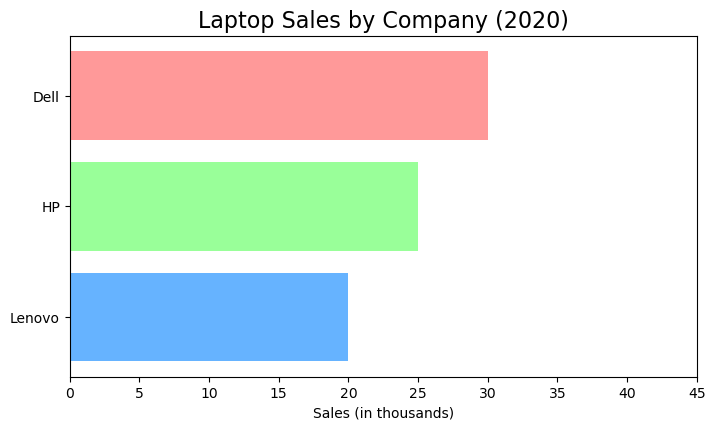

In [157]:

from matplotlib.animation import FuncAnimation

# Sample data
data = {
    'Year': [2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022],
    'Company': ['Dell', 'HP', 'Lenovo', 'Dell', 'HP', 'Lenovo', 'Dell', 'HP', 'Lenovo'],
    'Sales': [30, 25, 20, 35, 27, 23, 40, 30, 28]
}
dfs = pd.DataFrame(data)

# Set up figure
fig, ax = plt.subplots(figsize=(7, 4))
colors = ['#66b3ff', '#99ff99', '#ff9999']

def update(year):
    ax.clear()
    df_year = dfs[dfs['Year'] == year].sort_values(by='Sales', ascending=True)
    ax.barh(df_year['Company'], df_year['Sales'], color=colors)
    ax.set_title(f"Laptop Sales by Company ({year})", fontsize=16)
    ax.set_xlabel('Sales (in thousands)')
    ax.set_xlim(0, dfs['Sales'].max() + 5)

# Create animation
ani = FuncAnimation(fig, update, frames=sorted(dfs['Year'].unique()), repeat=False, interval=1000)
plt.tight_layout()
#plt.show()
from IPython.display import HTML
HTML(ani.to_jshtml())


In [156]:
ani

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1268 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1268 non-null   object 
 1   TypeName       1268 non-null   object 
 2   Ram            1268 non-null   int64  
 3   Weight         1268 non-null   float64
 4   Price          1268 non-null   float64
 5   Touchscreen    1268 non-null   int64  
 6   Ips            1268 non-null   int64  
 7   ppi            1268 non-null   float64
 8   Cpu brand      1268 non-null   object 
 9   HDD            1268 non-null   int64  
 10  SSD            1268 non-null   int64  
 11  Hybrid         1268 non-null   int64  
 12  Flash_Storage  1268 non-null   int64  
 13  Gpu brand      1268 non-null   object 
 14  os             1268 non-null   object 
dtypes: float64(3), int64(7), object(5)
memory usage: 190.8+ KB
